In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
df = pd.read_csv('data/stats.csv', encoding='utf-8')
df.columns = ['Time', 'Mode', 'Nick', 'Hero', 'Stat', 'Value']
df['Time'] = pd.to_datetime(df['Time']).dt.date
df.set_index('Time')

,Mode,Nick,Hero,Stat,Value
Time,,,,,
2021-02-01,Quickplay,slug,ALL HEROES,Barrier Damage Done - Most in Game,6074.00
2021-02-01,Quickplay,slug,ALL HEROES,Defensive Assists - Most in Game,19.00
2021-02-01,Quickplay,slug,ALL HEROES,Eliminations - Most in Game,33.00
2021-02-01,Quickplay,slug,ALL HEROES,Final Blows - Most in Game,19.00
2021-02-01,Quickplay,slug,ALL HEROES,Healing Done - Most in Game,9447.00
...,...,...,...,...,...
2021-03-18,Competitive,lundefugl,Bastion,Hero Damage Done - Avg per 10 Min,8726.00
2021-03-18,Competitive,lundefugl,Bastion,Objective Kills - Avg per 10 Min,7.77
2021-03-18,Competitive,lundefugl,Bastion,Objective Time - Avg per 10 Min,34.00


In [3]:
slug = df[(df['Nick'] == 'slug') & (df['Mode'] == 'Quickplay') & (df['Hero'] == 'Soldier: 76') & (df['Stat'].isin(['Eliminations','Deaths'])) ].pivot(index='Time', columns='Stat', values='Value')
slug['E/D'] = slug['Eliminations']/slug['Deaths']
slug['Death Diff'] = slug['Deaths'].diff()
slug['Elim Diff'] = slug['Eliminations'].diff()
slug['E/D2'] = slug['Elim Diff']/slug['Death Diff']
print(slug)

Stat        Deaths  Eliminations       E/D  Death Diff  Elim Diff       E/D2
Time                                                                        
2021-02-01   890.0        1981.0  2.225843         NaN        NaN        NaN
2021-02-02   894.0        1990.0  2.225951         4.0        9.0   2.250000
2021-02-03   938.0        2094.0  2.232409        44.0      104.0   2.363636
2021-02-04   968.0        2156.0  2.227273        30.0       62.0   2.066667
2021-02-05   998.0        2240.0  2.244489        30.0       84.0   2.800000
2021-02-06  1081.0        2432.0  2.249769        83.0      192.0   2.313253
2021-02-07  1083.0        2451.0  2.263158         2.0       19.0   9.500000
2021-02-08  1090.0        2457.0  2.254128         7.0        6.0   0.857143
2021-02-09  1129.0        2549.0  2.257750        39.0       92.0   2.358974
2021-02-10  1163.0        2700.0  2.321582        34.0      151.0   4.441176
2021-02-11  1163.0        2700.0  2.321582         0.0        0.0        NaN

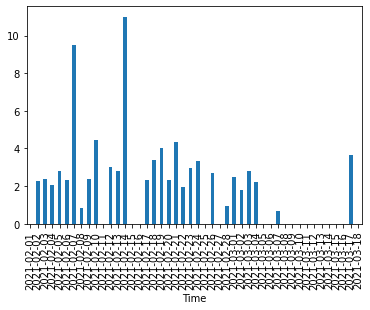

In [4]:
slug['E/D2'].plot.bar()
plt.xticks(rotation=90)
plt.show()

In [5]:
tmp = df[(df['Hero'] == 'Soldier: 76') & (df['Nick'] == 'slug') & (df['Mode'] == 'Quickplay') & (df['Stat'] == 'Critical Hit Accuracy')]

In [6]:
diff_df = [df['Time'], df['Value'].diff()]

In [7]:
# categories = sorted(df['Stat'].unique().tolist())
# for category in categories:
#     print(category)

In [8]:
# len(categories)

In [9]:
ratio = df[(df['Nick'] == 'slug') & (df['Mode'] == 'Quickplay') & (df['Hero'] == 'Soldier: 76') & (df['Stat'].isin(['Medals','Games Played'])) ].pivot(index='Time', columns='Stat', values='Value')
ratio['Ratio'] = ratio['Medals']/ratio['Games Played']
print(ratio)

Stat        Games Played  Medals     Ratio
Time                                      
2021-02-01         157.0   572.0  3.643312
2021-02-02         159.0   579.0  3.641509
2021-02-03         165.0   600.0  3.636364
2021-02-04         172.0   623.0  3.622093
2021-02-05         176.0   638.0  3.625000
2021-02-06         190.0   693.0  3.647368
2021-02-07         191.0   696.0  3.643979
2021-02-08         192.0   700.0  3.645833
2021-02-09         200.0   728.0  3.640000
2021-02-10         207.0   755.0  3.647343
2021-02-11         207.0   755.0  3.647343
2021-02-12         211.0   769.0  3.644550
2021-02-13         226.0   825.0  3.650442
2021-02-14         227.0   830.0  3.656388
2021-02-15         227.0   830.0  3.656388
2021-02-16         227.0   830.0  3.656388
2021-02-17         235.0   853.0  3.629787
2021-02-18         238.0   861.0  3.617647
2021-02-19         239.0   866.0  3.623431
2021-02-20         246.0   888.0  3.609756
2021-02-21         247.0   890.0  3.603239
2021-02-22 

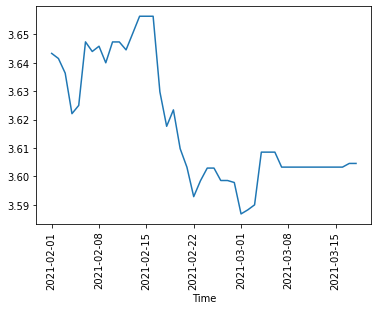

In [10]:
ratio['Ratio'].plot()
plt.xticks(rotation=90)
plt.show()

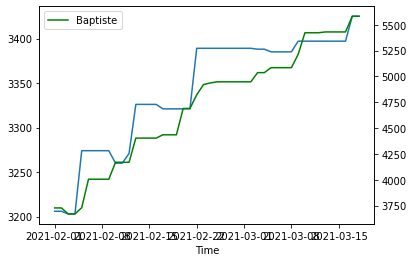

Hero        Baptiste   Mercy
Time                        
2021-02-01    3206.0  3727.0
2021-02-02    3206.0  3727.0
2021-02-03    3203.0  3669.0
2021-02-04    3203.0  3669.0
2021-02-05    3274.0  3729.0
2021-02-06    3274.0  4005.0
2021-02-07    3274.0  4005.0
2021-02-08    3274.0  4005.0
2021-02-09    3274.0  4005.0
2021-02-10    3260.0  4169.0
2021-02-11    3260.0  4169.0
2021-02-12    3271.0  4169.0
2021-02-13    3326.0  4403.0
2021-02-14    3326.0  4403.0
2021-02-15    3326.0  4403.0
2021-02-16    3326.0  4403.0
2021-02-17    3321.0  4435.0
2021-02-18    3321.0  4435.0
2021-02-19    3321.0  4435.0
2021-02-20    3321.0  4690.0
2021-02-21    3321.0  4690.0
2021-02-22    3389.0  4822.0
2021-02-23    3389.0  4921.0
2021-02-24    3389.0  4937.0
2021-02-25    3389.0  4948.0
2021-02-26    3389.0  4948.0
2021-02-27    3389.0  4948.0
2021-02-28    3389.0  4948.0
2021-03-01    3389.0  4948.0
2021-03-02    3389.0  4948.0
2021-03-03    3388.0  5037.0
2021-03-04    3388.0  5037.0
2021-03-05    

In [11]:
hero1 = df[(df['Nick'] == 'myoung') & (df['Mode'] == 'Quickplay') & (df['Hero'].isin(['Baptiste', 'Mercy'])) & (df['Stat'] == 'Healing Done - Avg per 10 Min')].pivot(index='Time', columns='Hero', values='Value')


# ax = hero1['Value'].plot()
hero1['Baptiste'].plot()
hero1['Mercy'].plot(secondary_y=True, style="g");
# hero2['Value'].plot(ax=ax)
plt.legend(['Baptiste', 'Mercy'])
plt.show()
print(hero1)

In [12]:
stats = df[(df['Nick'] == 'myoung') & (df['Mode'] == 'Quickplay') & (df['Hero'].isin(['Baptiste', 'Mercy']))].Stat.unique().tolist()
heroes = df[(df['Nick'] == 'myoung') & (df['Mode'] == 'Quickplay')].Hero.unique().tolist()
print(type(stats))
print(heroes)

<class 'list'>
['ALL HEROES', 'Ana', 'Baptiste', 'Bastion', 'Lúcio', 'Mei', 'Mercy', 'Moira', 'Orisa', 'Reinhardt', 'Roadhog', 'Sigma', 'Winston', 'Wrecking Ball', 'Zarya', 'Zenyatta', 'Soldier: 76', 'Brigitte']


In [13]:
a = heroes.pop(1)

In [14]:
herotime = df[(df['Nick'] == 'kidneypool') & (df['Stat'] == 'Time Played') & (df['Time'] == df.Time.max()) & (df['Hero'] != 'ALL HEROES')]
pd.options.mode.chained_assignment = None
herotime['Value'] = herotime['Value'].div(3600)
herotime_pivot = herotime.pivot(index='Hero', columns='Mode', values='Value').sort_values(by='Quickplay')

In [15]:
print(len(herotime['Hero'].unique()))

30


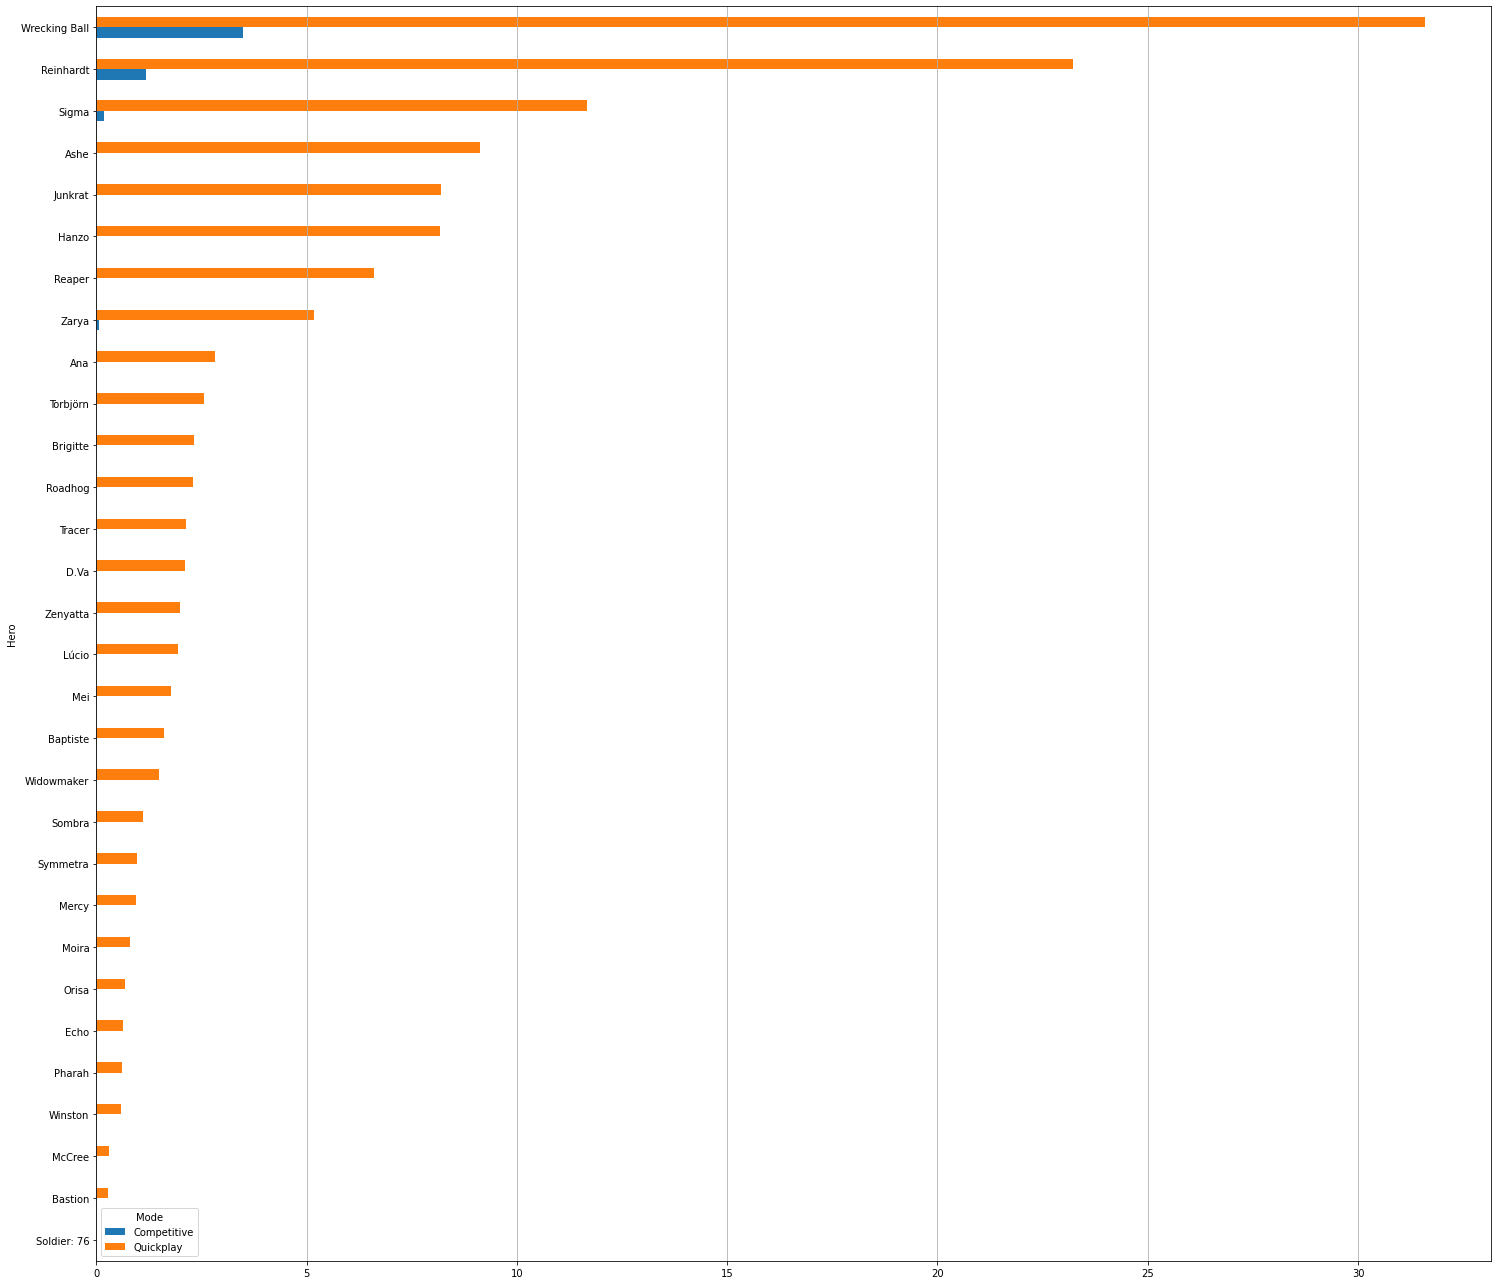

In [16]:
height = len(herotime['Hero'].unique()) / 1.3
herotime_pivot.plot(kind='barh', figsize=(25, height)).grid(axis='x')
plt.show()

In [17]:
tmp = df[(df['Nick'] == 'slug') & (df['Mode'] == mode) & (df['Hero'] == hero) & (
    df['Stat'].isin([stat1, stat2]))].pivot(index='Time', columns='Stat', values='Value')
tmp['Diff1'] = tmp[stat1].diff()
tmp['Diff2'] = tmp[stat2].diff()
tmp['Rate'] = tmp['Diff1']/tmp['Diff2']
tmp['Rate'].plot.bar()
plt.xticks(rotation=90)
plt.title(f'Daily rate - {hero} - {stat1}/{stat2}')

NameError: name 'mode' is not defined

In [ ]:
print(df.Time.max())

In [ ]:
recent = df[df['Time'] == df.Time.max()]

In [ ]:
print(recent['Stat'].unique())

In [ ]:
tmp = df[(df['Nick'] == 'lundefugl') & (df['Mode'] == 'Quickplay') & (df['Hero'] == 'ALL HEROES') & (
    df['Stat'].isin(['Cards', 'Games Played']))].pivot(index='Time', columns='Stat', values='Value')
tmp['cardrate'] = tmp['Cards'] / tmp['Games Played']
print(tmp)

In [33]:
tobben = df[(df['Nick'] == 'slug') & (df['Hero'] == 'Torbjörn') & (df['Stat'] == 'Turret Kills - Avg per 10 Min')].pivot(index='Time', columns='Mode', values='Value')
print(tobben)

Mode        Competitive  Quickplay
Time                              
2021-03-04          NaN      12.53
2021-03-05          NaN      15.42
2021-03-06          NaN      13.99
2021-03-07          NaN      14.42
2021-03-08          NaN      14.42
2021-03-09          NaN      14.42
2021-03-10          NaN      14.41
2021-03-11          NaN      14.41
2021-03-12          NaN      14.35
2021-03-13          NaN      15.12
2021-03-14          NaN      14.93
2021-03-15          NaN      14.93
2021-03-16          NaN      14.93
2021-03-17          NaN      14.95
2021-03-18        20.22      14.95
